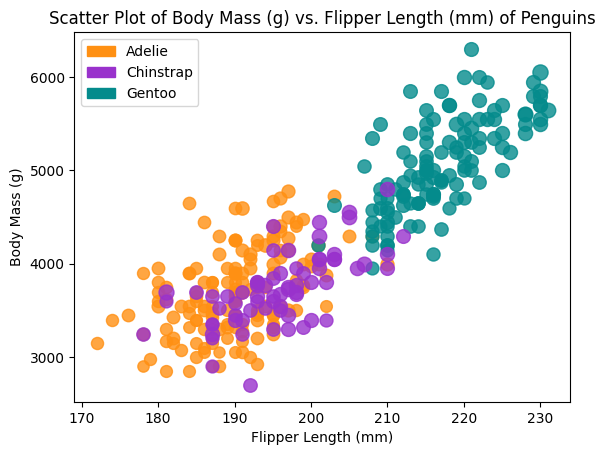

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# I learned about creating manual legends here: https://www.statology.org/matplotlib-manual-legend/

# Please Note: For this matplotlib replication, I am choosing to employ a technical achievement:
# I am filling in every NA value in the loaded dataset with the current average value (for quantities) or most frequent value (for categorical data) in that column.
# I am employing this technical improvement because NA/NAN values are unhashable in Python, which creates errors when trying to scatter all of the data.

column_list = ["species", "bill_length_mm", "flipper_length_mm", "body_mass_g"]
color_dictionary = {"Adelie": "#FF9013", "Chinstrap": "#9932CC", "Gentoo": "#048B8C"}

dataframe = pd.read_csv(
    "../penglings.csv",
    usecols=column_list,  # Select only subsets of columns from the csv file, which allows for more efficient file reading.
    na_filter=False,  # Do not filter the NA values.
)

# Fill in the NA values using the current mean or mode (mode used for species name) of the selected column:
for (feature_name, feature_data) in dataframe.items():
    if feature_name == column_list[0]:
        dataframe[feature_name].fillna(value=dataframe[feature_name].mode(), inplace=True)
    else: 
        dataframe[feature_name] = pd.to_numeric(dataframe[feature_name], errors='coerce')
        dataframe[feature_name].fillna(value=dataframe[feature_name].mean(), inplace=True)

for i in range(len(dataframe)):
    plt.scatter(dataframe.loc[i, "flipper_length_mm"], dataframe.loc[i, "body_mass_g"], c=color_dictionary[dataframe.loc[i, "species"]], alpha=0.8, s=(dataframe.loc[i, "bill_length_mm"]) * 2)
plt.title('Scatter Plot of Body Mass (g) vs. Flipper Length (mm) of Penguins')
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

plt.xticks([170, 180, 190, 200, 210, 220, 230]) 
plt.yticks([3000, 4000, 5000, 6000])

colorHandles, colorLabels = plt.gca().get_legend_handles_labels()

colorPatch1 = mpatches.Patch(color = "#FF9013", label = "Adelie")
colorPatch2 = mpatches.Patch(color = "#9932CC", label = "Chinstrap")
colorPatch3 = mpatches.Patch(color = "#048B8C", label = "Gentoo")

colorHandles.extend([colorPatch1, colorPatch2, colorPatch3])
plt.legend(handles=colorHandles)

plt.show()